In [1]:

using Plots, LinearAlgebra, Statistics, Distributions, StatsBase, DataFrames

In [2]:
N_param = 0.25
bounds_param = 1/1000

#Liczba agentów rodzaju I
Nᴵ =Int(5000*N_param)
#Liczba agentów rodzaju II
Nᴵᴵ = Int(25000*N_param)
#Liczba agentów rodzaju III
Nᴵᴵᴵ = Int(50000*N_param)  #SUMA 80000 (8*10^4)
#Ceny

P_górna⁽¹⁾= Int(35000*bounds_param)
P_górna⁽²⁾= Int(25000*bounds_param)
P_dolna⁽¹⁾= Int(23000*bounds_param)
P_górna⁽³⁾= Int(19000*bounds_param)
P_dolna⁽²⁾= Int(18000*bounds_param)
P_dolna⁽³⁾= Int(8000*bounds_param);

T = 12*40 #12 miesięcy - rok, 20 lat
CZAS = 12*15 #Piętnastoletnie ,,pożyczki" - zablokowanie czasu do szukania nowego mieszkania (można szukać tylko gdy CZASₙ = 0);

#Początkowe rozmieszczenie - przestrzenie trzech dzielnic: ciągłe
α₁ = 1 #Współczynnik kształtu - im większy tym ,,chudszy" ogon rozkładu PAreta
θ₁ = 0.1 #Skala - dla rozkładów Pareta x > θ (śmieszny błąd Julii - to co jest przed nawiasem to ,,vartheta", ale w komentarzach pojawia się również gdy wpiszemy \theta+TAB)
α₂ = 2
θ₂ = 0.1
α₃ = 5
θ₃ = 0.1


Pocz_rozk_I = Pareto(α₁, θ₁)
Pocz_rozk_II = Pareto(α₂, θ₂)
Pocz_rozk_III = Pareto(α₃, θ₃)

AGENCI = zeros(Float64, Nᴵ + Nᴵᴵ + Nᴵᴵᴵ, 5, T)  # [INDEKS AGENTA, [DZIELNICA,DOCHÓD,PIERWSZA WSPÓŁRZĘDNA,DRUGA WSPÓŁRZĘDNA,CZAS TRWANIA DŁUGU],T]
przyrost_param = 0.1

for n in 1:Nᴵ
     while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽¹⁾ || AGENCI[n,2,1] < P_dolna⁽¹⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_I) * (P_górna⁽¹⁾ - P_dolna⁽¹⁾) + P_dolna⁽¹⁾ #MOŻE TO BYĆ INNY MNOŻNIK, ALE SAMO P_górna MOŻE ZABRAĆ                                                                                                #WIĘCEJ CZASU
    end
    AGENCI[n,1,1:2] .= 1
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end
 
for n in Nᴵ+1:Nᴵ+Nᴵᴵ
    while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽²⁾ || AGENCI[n,2,1] < P_dolna⁽²⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_II) * (P_górna⁽²⁾ - P_dolna⁽²⁾) + P_dolna⁽²⁾ 
    end
    AGENCI[n,1,1:2] .= 2
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end
 
for n in Nᴵ+Nᴵᴵ+1:Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
    while AGENCI[n,2,1] <= 0 || AGENCI[n,2,1] > P_górna⁽³⁾ || AGENCI[n,2,1] < P_dolna⁽³⁾
        AGENCI[n,2,1] = rand(Pocz_rozk_III) * (P_górna⁽³⁾ - P_dolna⁽³⁾) + P_dolna⁽³⁾ 
    end
    AGENCI[n,1,1:2] .= 3
    AGENCI[n,3,1:2] .= AGENCI[n,2,1] 
    AGENCI[n,4,1:2] .= rand(Uniform(0, 1))
end

#ILU AGENTÓW MA POCZĄTKOWO NIEZEROWY DŁUG (SPŁATY POZA MODELEM)?
Nᵖᵒᶜᶻᵈᵍ = Nᴵ+Nᴵᴵ+Nᴵᴵᴵ
X = rand(1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ,Nᵖᵒᶜᶻᵈᵍ)
for m in 1:Nᵖᵒᶜᶻᵈᵍ
    AGENCI[X[m],5,1] =  rand(1:CZAS) #LOSOWA ZAPADALNOŚĆ DŁUGU - TUTAJ JEST TO LICZBA MIESIĘCY OD ZACIĄGNIĘCIA
    if AGENCI[X[m],5,1] == CZAS
        AGENCI[X[m],5,2] = 0
    else
        AGENCI[X[m],5,2] = AGENCI[X[m],5,1] + 1
    end
end


## Wizualizacja uciętych rozkładów Pareto

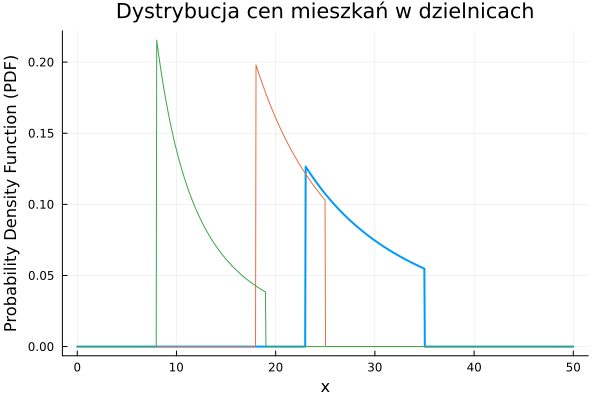

In [3]:

# Define the truncated Pareto distribution
d1 = truncated(Pocz_rozk_I, P_dolna⁽¹⁾, P_górna⁽¹⁾)
d2 = truncated(Pocz_rozk_I, P_dolna⁽²⁾, P_górna⁽²⁾)
d3 = truncated(Pocz_rozk_I, P_dolna⁽³⁾, P_górna⁽³⁾)

# Generate a range of x values
x = range(0, stop=50, length=1000)

# Compute the PDF at each x value
y1 = pdf.(d1, x)
y2 = pdf.(d2, x)
y3 = pdf.(d3, x)

przyrost_2 = pdf.(Pocz_rozk_II*P_górna⁽²⁾*0.025,x)

# Create the plot
plot(x, y1, 
    xlabel="x", 
    ylabel="Probability Density Function (PDF)", 
    title= "Dystrybucja cen mieszkań w dzielnicach", 
    legend=false,
    linewidth=2)
plot!(x, y2)
plot!(x, y3) 


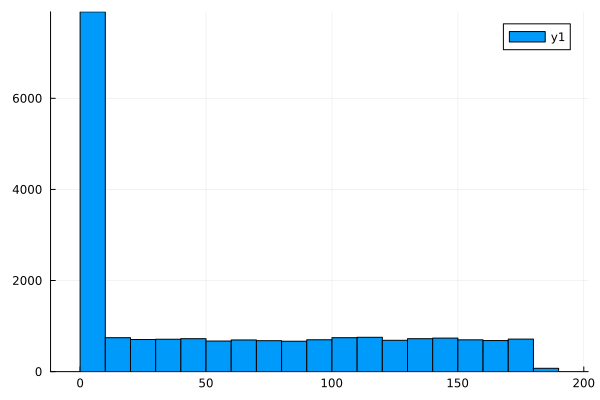

In [4]:
histogram(AGENCI[:,5,2])
# Ludziom dług znika!!!
# AGENCI[1:20,5,2:3]

AGENCI
1. wymiar - nr agenta
2. wymiar
    * 1 kolumna - dzielnica
    * 2 kolumna - majątek
    * 3 kolumna - cena mieszkanie
    * 4 kolumna - lokalizacja ????
    * 5 kolumna - dlug
3. wymiary - czas

In [5]:

@time begin
    for t in 2:T-1
        #WZROST/WAHANIA CEN?
        for n in 1:Nᴵ + Nᴵᴵ + Nᴵᴵᴵ
            # if n != 1
            #     continue
            # end 
            # Czy jestem w dzielnicy 3?
            if AGENCI[n,1,t] == 3
                przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾*przyrost_param
                while przyrost > P_górna⁽³⁾
                    przyrost = rand(Pocz_rozk_III)*P_górna⁽³⁾*przyrost_param
                end
                #Zwiększanie majątku
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                #Jeżeli mój majątek wzrósł i nie mam długu
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                   #Jeżeli mieszkam w domu kwalifikującym mnie do dzielnicy 3
                    if AGENCI[n,3,t] < P_dolna⁽²⁾ 
                        # print("3.1")
                        #Losujemy jakiś do z dzielnicy 3
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
                        AGENCI[n,1,t+1] = 3
                        # Jeżeli móju majątek jest większy niż cena domu, a dom droższy od aktualnego
                        # to go kupuje i losujemy lokalizacje
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1 # Zakup zaciągnieciem długu
                        else
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0 #Brak długu
                        end
                    #Jeśli mój majątek umożliwia mi przeniesienie się do dzielnicy wyżej
                    else
                        # print("3.2")
                         #Losujemy jakiś do z dzielnicy 2 (ale nie droższy niż najdroższy z 3)
                        próba = rand(truncated(Pocz_rozk_III; lower=P_dolna⁽²⁾, upper=P_górna⁽³⁾))
                        # Jeżeli móju majątek jest większy niż cena domu, a dom droższy od aktualnego
                        # to go kupuje i losujemy lokalizacje
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1 # Zakup skutkuje długiem
                        else
                            AGENCI[n,1,t+1] = 3
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0 #Brak długu
                        end
                    end
                 # Jeśli mój majątek "spadł" lub miałem dług to:
                else
                    # print("3.3")
                    AGENCI[n,1,t+1] = 3
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    # Jak długu nie miałem lub nadszedł czas jego spłaty to dług się zeruje
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    # W przeciwym wypadku mój dług rośnie
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            elseif AGENCI[n,1,t] == 2 
                przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾*przyrost_param
                while przyrost > P_górna⁽²⁾
                    przyrost = rand(Pocz_rozk_II)*P_górna⁽²⁾*przyrost_param
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1] && AGENCI[n,5,t] == 0
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    if AGENCI[n,3,t] < P_dolna⁽²⁾
                        # print("2.1")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))
                        AGENCI[n,1,t+1] = 2
                        if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 2 # to musialem dodać
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2 # to musialem dodać
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    else
                        # print("2.2")
                        próba = rand(truncated(Pocz_rozk_II; lower=P_dolna⁽¹⁾, upper=P_górna⁽²⁾))
                         if próba > AGENCI[n,3,t] && AGENCI[n,2,t] > próba
                            AGENCI[n,1,t+1] = 1
                            AGENCI[n,3,t+1] = próba
                            AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                            AGENCI[n,5,t+1] = 1
                        else
                            AGENCI[n,1,t+1] = 2
                            AGENCI[n,3,t+1] = AGENCI[n,3,t]
                            AGENCI[n,4,t+1] = AGENCI[n,4,t]
                            AGENCI[n,5,t+1] = 0
                        end
                    end
                else
                    # print("2.3")
                    AGENCI[n,1,t+1] = 2
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            else
                przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾*przyrost_param
                while przyrost > P_górna⁽¹⁾
                    przyrost = rand(Pocz_rozk_I)*P_górna⁽¹⁾*przyrost_param
                end
                AGENCI[n,2,t] = AGENCI[n,2,t-1] + przyrost
                if AGENCI[n,2,t] > AGENCI[n,2,t-1]  && AGENCI[n,5,t] == 0
                    # print("1.1")
                   #Szukamy lepszego miejsca
                    #próba = rand(Uniform(AGENCI[n,3,t-1],AGENCI[n,2,t]))
                    próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                    if AGENCI[n,3,t] < próba && AGENCI[n,2,t] > próba
                        # próba = rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = próba
                        AGENCI[n,4,t+1] = rand(Uniform(0, 1))
                        AGENCI[n,5,t+1] = 1
                    else
                        AGENCI[n,1,t+1] = 1
                        AGENCI[n,3,t+1] = AGENCI[n,3,t]
                        AGENCI[n,4,t+1] = AGENCI[n,4,t]
                        AGENCI[n,5,t+1] = 0
                    end
                else
                    # print("1.2")
                    AGENCI[n,1,t+1] = 1
                    AGENCI[n,3,t+1] = AGENCI[n,3,t]
                    AGENCI[n,4,t+1] = AGENCI[n,4,t]
                    if AGENCI[n,5,t] == 0 || AGENCI[n,5,t] == CZAS
                        AGENCI[n,5,t+1] = 0
                    else
                        AGENCI[n,5,t+1] = AGENCI[n,5,t] + 1
                    end
                end
            end 
        end
    end
end


 11.825978 seconds (166.26 M allocations: 2.650 GiB, 3.79% gc time, 0.43% compilation time)


In [6]:
# using XLSX
# XLSX.writetable("agent_example3.xlsx", DataFrame(AGENCI[1,:,:], :auto))

rand(truncated(Pocz_rozk_III; lower=P_dolna⁽³⁾, upper=P_górna⁽³⁾))
rand(truncated(Pocz_rozk_I; lower=P_górna⁽²⁾, upper=P_górna⁽¹⁾))
rand(truncated(Pocz_rozk_II; lower=P_dolna⁽²⁾, upper=P_górna⁽²⁾))


22.93711386404687

In [7]:
# using XLSX
# XLSX.writetable("agent_example_5.xlsx", DataFrame(, :auto))

transpose(AGENCI[(AGENCI[:,1,1] .== 3),5,1:4])

4×12500 transpose(::Matrix{Float64}) with eltype Float64:
 0.0  23.0  61.0  0.0  0.0  0.0  0.0  …  107.0  0.0  71.0  24.0  153.0  0.0
 0.0  24.0  62.0  0.0  0.0  0.0  0.0     108.0  0.0  72.0  25.0  154.0  0.0
 0.0  25.0  63.0  0.0  0.0  1.0  0.0     109.0  0.0  73.0  26.0  155.0  0.0
 0.0  26.0  64.0  0.0  0.0  2.0  0.0     110.0  0.0  74.0  27.0  156.0  0.0

## Na podstawie array AGENCI:
* Wykres udziałów dzielnicy według ludzi w niej zamieszkającej (procent całoście per dzielnica - 3 wykresy)
* Wykres udziałów dla wszystkich dzielnic jednocześnie (1)
* Wykresy zmian procentów per dzielnica (3 wykresy)

to będzie baza do dalszych wykresów, jak zwiększymy ilość agentów to będzie to wykorzystywane do analizy wrażliwości

In [8]:

using DataFrames
dzielnice_counts_df = DataFrame()

for t in 1:T
    to_count = string.(AGENCI[:,1:1,t])
    counts = countmap(to_count)
    # print(t)
    for key in ["1.0", "2.0", "3.0"]
        if !(key in keys(counts))
            counts[key] = 0
        end 
    end
    if t == 1
        dzielnice_counts_df = DataFrame(counts)
    else
        tmp_df = DataFrame(copy(counts))
        dzielnice_counts_df = vcat(dzielnice_counts_df,tmp_df)
    end
end

# dzielnice_counts_df[!,:RowSum] = [sum(row) for row in eachrow(dzielnice_counts_df)];

rename!(dzielnice_counts_df, Dict(:1 => :district_1));
rename!(dzielnice_counts_df, Dict(:2 => :district_2));
rename!(dzielnice_counts_df, Dict(:3 => :district_3));

In [9]:
dzielnice_counts_df[:,["district_1","district_2","district_3"]]

Row,district_1,district_2,district_3
,Int64,Int64,Int64
1,1250,6250,12500
2,1250,6250,12500
3,1263,6237,12500
4,1278,6222,12500
5,1318,6182,12500
6,1366,6134,12500
7,1437,6063,12500
8,1522,5978,12500
9,1680,5820,12500


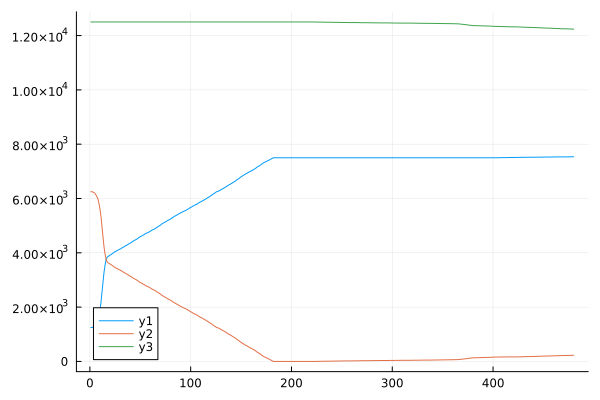

In [10]:

plot(dzielnice_counts_df."district_1")
plot!(dzielnice_counts_df."district_2")
plot!(dzielnice_counts_df."district_3")
# AGENCI[(AGENCI[:,1,3] .== 0.0),:,1:10][1,:,:]

In [11]:

# Apply the function to add a new column with log returns

function percent_change!(df::DataFrame, column::String)
    df[!, Symbol(string(column, "_pct"))] = [missing; diff(df[!, column])./ df[1:end-1, column]]
end

# function add_log_returns!(df::DataFrame, column::String)
#     df[!, Symbol(string(column, "_logpct"))] = [missing; diff(log.(df[!, column]))]
# end


# Apply the function to add a new column with percent change and log returns
for col in names(dzielnice_counts_df)
    percent_change!(dzielnice_counts_df, col)
    # add_log_returns!(dzielnice_counts_df, col)
end



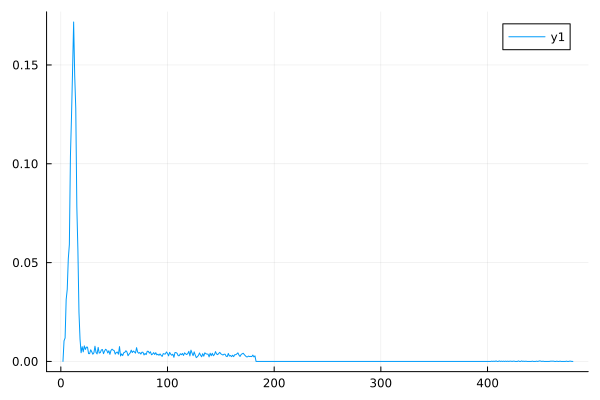

In [12]:
plot(dzielnice_counts_df."district_1_pct")

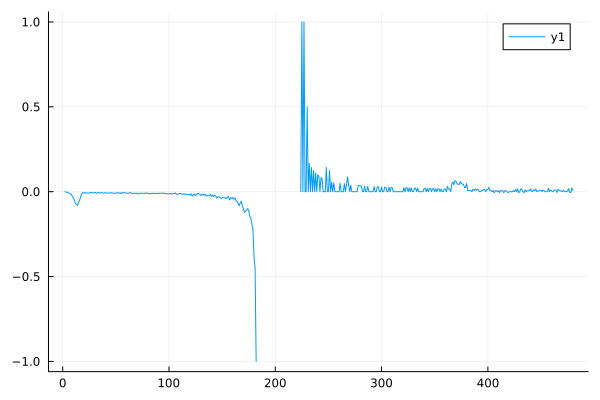

In [13]:
plot(dzielnice_counts_df."district_2_pct")

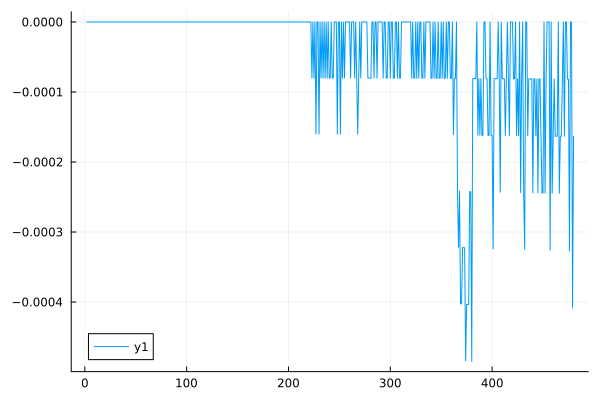

In [14]:
plot(dzielnice_counts_df."district_3_pct")

In [15]:
# plot(dzielnice_counts_df."district_1_logpct")
# plot!(dzielnice_counts_df."district_2_logpct")
# plot!(dzielnice_counts_df."district_3_logpct")

In [16]:
#nie ogarniam twojej funkcji do liczenia procentow wiec napisałam swoją

# Funkcja do obliczania procentowych udziałów
function calculate_percentages(df)
    for col in names(df)
        if occursin("_pct", string(col))
            continue
        end
        total = sum(df[!, col])
        df[!, Symbol(string(col, "_pct"))] .= df[!, col] ./ total * 100
    end
    return df
end

# Funkcja do obliczania zmian procentowych
function calculate_percentage_changes(df)
    for col in names(df)
        if occursin("_pct", string(col))
            percent_change!(df, col)
        end
    end
    return df
end


calculate_percentage_changes (generic function with 1 method)

In [17]:

# Obliczanie procentowych udziałów
dzielnice_counts_df = calculate_percentages(dzielnice_counts_df)

# Obliczanie zmian procentowych
calculate_percentage_changes(dzielnice_counts_df)


Row,district_1,district_2,district_3,district_1_pct,district_2_pct,district_3_pct,district_1_pct_pct,district_2_pct_pct,district_3_pct_pct
,Int64,Int64,Int64,Float64,Float64,Float64,Float64?,Float64?,Float64?
1,1250,6250,12500,0.0389377,1.50393,0.209234,missing,missing,missing
2,1250,6250,12500,0.0389377,1.50393,0.209234,0.0,0.0,0.0
3,1263,6237,12500,0.0393426,1.5008,0.209234,0.0104,-0.00208,0.0
4,1278,6222,12500,0.0398099,1.4972,0.209234,0.0118765,-0.002405,0.0
5,1318,6182,12500,0.0410559,1.48757,0.209234,0.0312989,-0.0064288,0.0
6,1366,6134,12500,0.0425511,1.47602,0.209234,0.0364188,-0.00776448,0.0
7,1437,6063,12500,0.0447627,1.45894,0.209234,0.0519766,-0.0115748,0.0
8,1522,5978,12500,0.0474105,1.43848,0.209234,0.059151,-0.0140195,0.0
9,1680,5820,12500,0.0523322,1.40046,0.209234,0.103811,-0.0264302,0.0


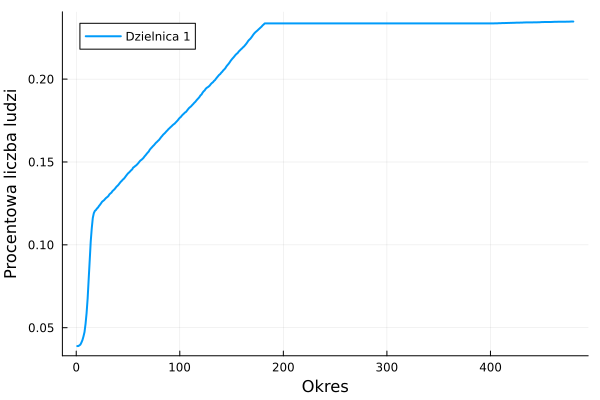

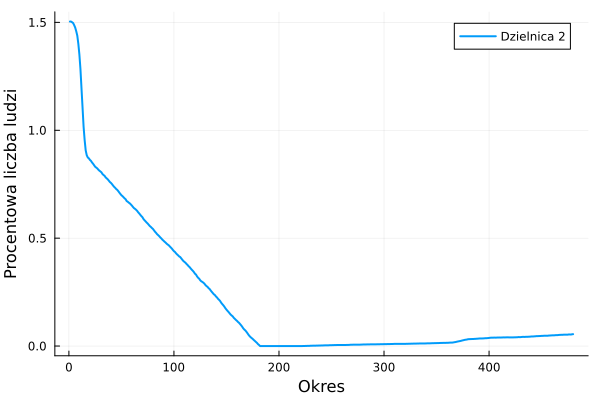

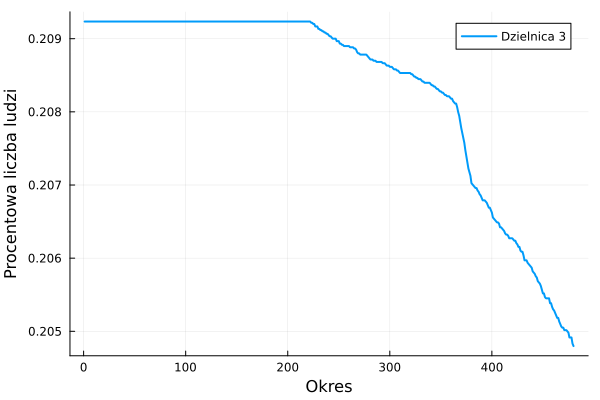

In [18]:
# Wykresy udziałów dzielnicy według ludzi w niej zamieszkającej
district_1_plot = plot(dzielnice_counts_df[!,:district_1_pct], xlabel="Okres", ylabel="Procentowa liczba ludzi", label="Dzielnica 1", linewidth=2)
district_2_plot = plot(dzielnice_counts_df[!,:district_2_pct], xlabel="Okres", ylabel="Procentowa liczba ludzi", label="Dzielnica 2", linewidth=2)
district_3_plot = plot(dzielnice_counts_df[!,:district_3_pct], xlabel="Okres", ylabel="Procentowa liczba ludzi", label="Dzielnica 3", linewidth=2)

display(district_1_plot)
display(district_2_plot)
display(district_3_plot)


#cos nie wyglada dobrze dla 2 dzielnicy

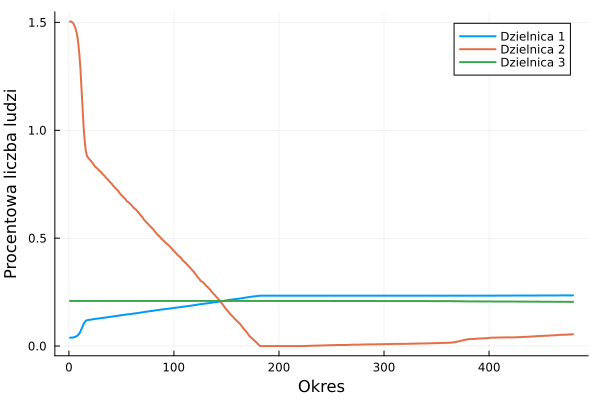

In [19]:
# Wykres udziałów dla wszystkich dzielnic jednocześnie
all_districts_plot = plot(dzielnice_counts_df[!,:district_1_pct], label="Dzielnica 1", linewidth=2)
plot!(dzielnice_counts_df[!,:district_2_pct], label="Dzielnica 2", linewidth=2)
plot!(dzielnice_counts_df[!,:district_3_pct], label="Dzielnica 3", linewidth=2)
xlabel!("Okres")
ylabel!("Procentowa liczba ludzi")

display(all_districts_plot)

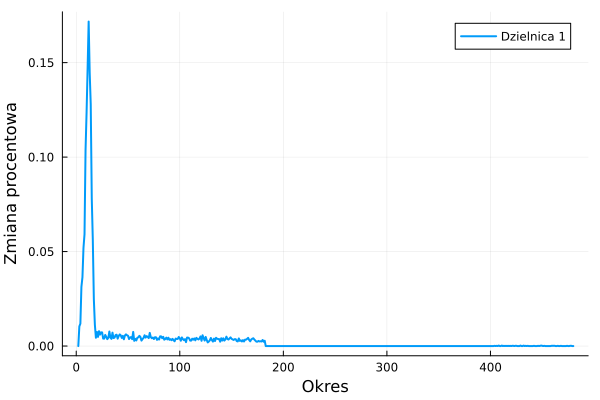

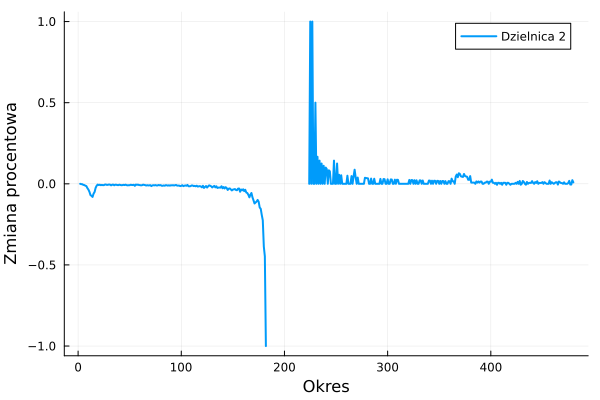

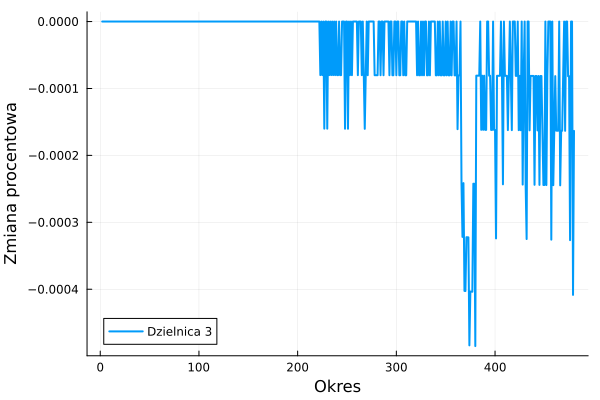

In [20]:
# Wykresy zmian procentowych per dzielnica
district_1_change_plot = plot(dzielnice_counts_df[!,:district_1_pct_pct], xlabel="Okres", ylabel="Zmiana procentowa", label="Dzielnica 1", linewidth=2)
district_2_change_plot = plot(dzielnice_counts_df[!,:district_2_pct_pct], xlabel="Okres", ylabel="Zmiana procentowa", label="Dzielnica 2", linewidth=2)
district_3_change_plot = plot(dzielnice_counts_df[!,:district_3_pct_pct], xlabel="Okres", ylabel="Zmiana procentowa", label="Dzielnica 3", linewidth=2)

display(district_1_change_plot)
display(district_2_change_plot)
display(district_3_change_plot)

## Skumulowany dług

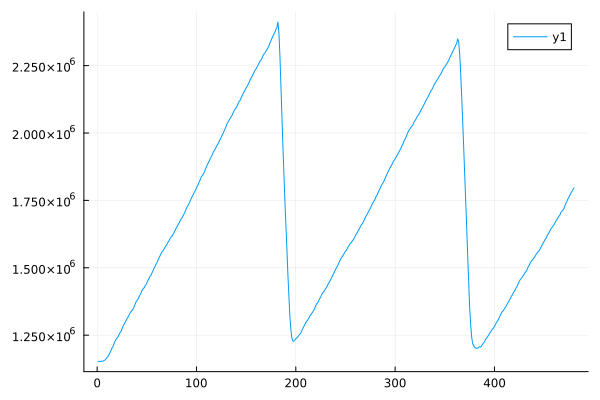

In [21]:
#WTFy xD - bedzie trzeba to zbadać
CZAS_SUMS = sum(AGENCI[:,5,:], dims = 1);
dlug_df = DataFrame(transpose(CZAS_SUMS), :auto)
plot(dlug_df.x1)

## Wielka spłata długu

## Analiza wrażliwości

### Wstęp - funkcja

In [22]:
include("xd.jl")
T = 12 * 40

480

In [ ]:
# Perform one simulation
AGENCI = schelling_sym();

In [ ]:
## Calc counts
dzielnice_counts_df = calc_counts(AGENCI)

In [ ]:
plot(dzielnice_counts_df."district_1")
plot!(dzielnice_counts_df."district_2")
plot!(dzielnice_counts_df."district_3")

## Siatka parametrów

In [ ]:
# Initialize an empty dictionary
dict_params = Dict()

id = 1
len = length(range(0.4, 4.2, step=0.2))
for i in range(0.4, 4.2, step=0.2)
    # Create a tuple with parameters
    param_tuple = (
        α₁ = 1.0 * i,
        θ₁ = 0.1,
        α₂ = 2.0 * i,
        θ₂ = 0.1,
        α₃ = 5.0 * i,
        θ₃ = 0.1
    )
    # Add the tuple as a key with an empty array as its value
    dict_params[id] = param_tuple
    id +=1
end

df_params = DataFrame([value for (key, value) in dict_params])


Warning performing SA!

### Zapisywanie wyników

In [ ]:
dict_sa = Dict()

for (key, params) in dict_params
    dict_sa[key] = schelling_sym(
        0.25,                # N_param
        1/1000,              # bounds_param
        params.α₁,           # param1
        params.θ₁,           # param2
        params.α₂,           # param3
        params.θ₂,           # param4
        params.α₃,           # param5
        params.θ₃,           # param6
        12 * 40,             # T
        0.1                  # przyrost_param
    )
    println(params.α₁)
     # Explicitly clear memory if possible
     GC.gc()  # Trigger garbage collection to free up memory
end

In [ ]:
# using JLD2
# @save "workspace.jld2" dict_sa
# @load "workspace.jld2"

## Analiza wrażliwości wykres

In [ ]:
counts_dict = Dict()

for (id, value) in dict_sa
    counts_dict[id] = calc_counts(value)
end

In [ ]:
using Plots

num_colors = len
colors = [RGB(i/(num_colors-1), 0.0, 1.0 - i/(num_colors-1)) for i in 0:num_colors-1]

# colors = {key => colors for key in range(0.5, 2, step=0.1)}

p = plot(legend = false)

ii =1 
for (key, value) in counts_dict
    plot!(value.district_1, label="District 1", color=colors[key])
    ii +=1
end

display(p)

In [ ]:
p = plot(legend = false)

ii =1 
for (key, value) in counts_dict
    plot!(value.district_2, label="District 2", color=colors[key])
    ii +=1
end

display(p)

In [ ]:
p = plot(legend = false)

ii =1 
for (key, value) in counts_dict
    plot!(value.district_3, label="District 3", color=colors[key])
    ii +=1
end

display(p)